## selenium 라이브러리
- 웹 어플리케이션을 테스트하기 위한 라이브러리
- python code를 이용해 웹 브라우저 제어
    - 함수의 형태로 클릭이나, 특정 공간에 값을 입력하는 부분
- 구글 크롬 이용 시 구버전 이용하면 별도의 SW 설치 필요

In [37]:
# # 라이브러리 설치
# !pip install selenium

In [38]:
from selenium import webdriver

In [39]:
# webdrier: 웹 브라우저들의 모임
driver = webdriver.Chrome()

In [40]:
# 웹 브라우저에 url 주소를 입력하여 요청
driver.get('https://www.naver.com')

In [41]:
# 웹 브라우저에 html 문서를 문자형으로 받아온다
html_data = driver.page_source

'<html lang="ko" class="fzoom" data-dark="false"><head><script async="" src="https://ntm.pstatic.net/ex/nlog.js"></script><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="
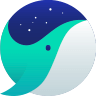
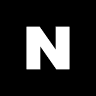

In [42]:
html_data

In [43]:
from bs4 import BeautifulSoup as bs

In [44]:
# html_data(문자형)를 파싱
soup = bs(html_data, 'html.parser')

In [45]:
len(soup.find_all('a'))

209

- fine_element()
    - driver에 있는 태그 중 조건에 맞는 첫번째 태그 선택
    - BeautifulSoup의 find() 함수의 결과와 비슷한 기능
    - 결과값에 find_xx() 함수 이용 가능
- find_elements()
    - driver에 있는 태그 중 조건에 맞는 모든 태그 선택
    - BeautifulSoup의 find_all() 함수 결과와 비슷한 기능

In [46]:
# html 문서 안에서 태그의 속성값으로 접근이 수월한 기능
from selenium.webdriver.common.by import By
# 웹 브라우저에서 특정 이벤트를 발생시키는 기능
from selenium.webdriver.common.keys import Keys

- 검색어 입력창에 '커피'를 입력하고 엔터키 치기

In [47]:
# html 문서에서 id가 query인 태그 선택 (검색어 입력창)
element = driver.find_element(By.ID, 'query')

In [48]:
# element에 특정 문자 입력
element.send_keys('커피')

In [49]:
# element에 키보드의 특수 이벤트인 ENTER 입력
element.send_keys(Keys.ENTER)

In [50]:
# class가 lst_total인 태그 선택
navbar = driver.find_element(By.CLASS_NAME, 'lst_total') 

In [51]:
# navbar에서 class가 link_tit인 태그를 모두 찾기
links = navbar.find_elements(By.CLASS_NAME, 'link_tit')

In [59]:
links[0].click()

In [60]:
driver.window_handles

['599A7B345CE06010E0A1858BF8F10CC8',
 '98F3B4414115CA106D8A01ADCB233213',
 '5E1AE0E841387587E383772A3A93CF38']

In [61]:
soup_test = bs(driver.page_source, 'html.parser')

In [62]:
soup_test.title

<title>커피 : 네이버 검색</title>

In [71]:
# driver에서 탭을 이동
driver.switch_to.window(
    driver.window_handles[2]
)

In [72]:
soup = bs(
    driver.page_source, 'html.parser'
)
soup.title

<title>커피 - 위키백과, 우리 모두의 백과사전</title>

1. soup에서 div 태그 중 id가 mw-content-text인 태그를 선택해 div_data 변수에 대입
2. div_data에서 p태그를 모두 찾아 p_list에 대입
3. p_list 각각 원소의 문자를 추출해 새로운 리스트 p_text에 대입

In [74]:
div_data = soup.find(
    'div', attrs={
        'id' : 'mw-content-text'
    }
)

In [80]:
p_list = div_data.find_all('p')

In [86]:
p_text = []
for data in p_list:
    p_text.append(data.get_text().strip())
p_text

['커피(영어: coffee, 咖啡, 珈琲, 가배, 문화어: 흑차, 검은차), 커피차 또는 커피음료(영어: coffee beverage)는 커피 나무 열매의 씨(커피콩)를 볶아 가루로 낸 것을 따뜻한 물과 차가운 물 또는 증기로 우려내어 마시는, 쓴맛이 나는 짙은 갈색의 음료이다.',
 '색이 어둡고 쓴맛이 있으며 약산성인 커피는 주로 카페인 함량으로 인해 인간에게 자극 효과를 준다. 전세계 뜨거운 음료 시장에서 가장 높은 판매량을 기록하고 있다.[2]',
 '커피나무 열매의 씨앗을 분리하여 볶지 않은 녹색 커피콩을 생산한다. 원두를 로스팅한 다음 일반적으로 뜨거운 물에 담근 후 미세한 입자로 갈아서 걸러내어 커피 한 잔을 만든다. 일반적으로 뜨겁게 제공되지만 차가운 아이스 커피가 일반적이다. 커피는 다양한 방법으로 준비되고 제공될 수 있다(예: 에스프레소, 프렌치 프레스, 카페 라떼 또는 이미 끓인 캔커피). 쓴맛을 가리거나 풍미를 강화하기 위해 설탕, 설탕 대체물, 우유, 크림을 첨가하는 경우가 많다.',
 '커피는 이제 세계적인 상품이 되었지만 홍해 주변의 음식 전통과 밀접하게 연관되어 있는 오랜 역사를 가지고 있다. 현대 음료로서 커피를 마시는 것에 대한 가장 신뢰할 수 있는 증거는 15세기 중반 아라비아 남부의 현대 예멘 수피 사원에서 나타난다. 그곳에서 커피 씨앗은 현재 준비되는 방식과 유사한 방식으로 처음으로 로스팅되고 양조되었다. 커피 원두는 소말리아 해안 중개인을 통해 에티오피아고원의 예멘인이 조달하여 예멘에서 재배했다. 16세기에 이 음료는 중동과 북아프리카의 나머지 지역으로 퍼져나갔고 나중에 유럽으로 퍼졌다.[3]',
 '가장 일반적으로 재배되는 두 가지 커피 콩 유형은 C. 아라비카와 C. 로부스타이다.[4] 커피나무는 70여 개국, 주로 아메리카 대륙, 동남아시아, 인도 아대륙, 아프리카의 적도 지역에서 재배된다. 2018년 기준으로 브라질은 세계 커피 원두 생산량의 35%를 생산하는 주요 커피 생산국이었다. 볶지 않은 녹색 커피는 농산

In [87]:
# map 함수 사용
p_text = list(
    map(
        lambda p_data : p_data.get_text().strip(),
        p_list
    )
)
p_text

['커피(영어: coffee, 咖啡, 珈琲, 가배, 문화어: 흑차, 검은차), 커피차 또는 커피음료(영어: coffee beverage)는 커피 나무 열매의 씨(커피콩)를 볶아 가루로 낸 것을 따뜻한 물과 차가운 물 또는 증기로 우려내어 마시는, 쓴맛이 나는 짙은 갈색의 음료이다.',
 '색이 어둡고 쓴맛이 있으며 약산성인 커피는 주로 카페인 함량으로 인해 인간에게 자극 효과를 준다. 전세계 뜨거운 음료 시장에서 가장 높은 판매량을 기록하고 있다.[2]',
 '커피나무 열매의 씨앗을 분리하여 볶지 않은 녹색 커피콩을 생산한다. 원두를 로스팅한 다음 일반적으로 뜨거운 물에 담근 후 미세한 입자로 갈아서 걸러내어 커피 한 잔을 만든다. 일반적으로 뜨겁게 제공되지만 차가운 아이스 커피가 일반적이다. 커피는 다양한 방법으로 준비되고 제공될 수 있다(예: 에스프레소, 프렌치 프레스, 카페 라떼 또는 이미 끓인 캔커피). 쓴맛을 가리거나 풍미를 강화하기 위해 설탕, 설탕 대체물, 우유, 크림을 첨가하는 경우가 많다.',
 '커피는 이제 세계적인 상품이 되었지만 홍해 주변의 음식 전통과 밀접하게 연관되어 있는 오랜 역사를 가지고 있다. 현대 음료로서 커피를 마시는 것에 대한 가장 신뢰할 수 있는 증거는 15세기 중반 아라비아 남부의 현대 예멘 수피 사원에서 나타난다. 그곳에서 커피 씨앗은 현재 준비되는 방식과 유사한 방식으로 처음으로 로스팅되고 양조되었다. 커피 원두는 소말리아 해안 중개인을 통해 에티오피아고원의 예멘인이 조달하여 예멘에서 재배했다. 16세기에 이 음료는 중동과 북아프리카의 나머지 지역으로 퍼져나갔고 나중에 유럽으로 퍼졌다.[3]',
 '가장 일반적으로 재배되는 두 가지 커피 콩 유형은 C. 아라비카와 C. 로부스타이다.[4] 커피나무는 70여 개국, 주로 아메리카 대륙, 동남아시아, 인도 아대륙, 아프리카의 적도 지역에서 재배된다. 2018년 기준으로 브라질은 세계 커피 원두 생산량의 35%를 생산하는 주요 커피 생산국이었다. 볶지 않은 녹색 커피는 농산

### 야후파이낸스 데이터 크롤링
- 특정 검색어의 News 페이지 기사 헤드라인, url 불러오기
1. driver 생성 
2. "https://finance.yahoo.com/" 주소로 요청
3. id가 'ybar-sbq'인 태그를 선택 
4. AAPL 문자열 입력하고 ENTER 이벤트 발생
5. CSS_SECLECTOR가 item yf-x2pyjv인 태그 중 두번째를 클릭 
6. page_source 불러와서 BeautifulSoup 변환
7. driver 종료
8. ul태그 중 class가 stream-items yf-1drgw5l인 태그를 선택 
9. a태그를 모두 선택 
10. a 태그 각각 원소에서 href 속성의 값을 새로운 리스트에 대입 
    - 중복 데이터 제거 
    - http로 시작하는 주소만 대입
11. 8번 과정에서 선택한 tag에서 h3 태그를 모두 선택 
12. h3 각각 원소에 텍스트 추출하여 새로운 리스트에 대입

In [ ]:
# 라이브러리 실행
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs

In [88]:
# 웹 브라우저 오픈
driver = webdriver.Chrome()

In [89]:
# 야후파이낸스 접속
driver.get('https://finance.yahoo.com')

In [90]:
# 상단 검색어창 선택
element = driver.find_element(By.ID, 'ybar-sbq')

In [ ]:
# 검색어창에 AAPL 입력
element.send_keys('AAPL')

In [ ]:
# 검색어창에 키보드의 특수 이벤트 (ENTER) 입력
element.send_keys(Keys.ENTER)

- CSS_SELECTOR
    - class -> .클래스명
    - id -> #아이디명

In [ ]:
# elements : 검색한 결과 페이지의 좌측 사이드바의 메뉴를 모두 선택
elements = driver.find_elements(By.CSS_SELECTOR, '.item.yf-x2pyjv')

In [ ]:
len(elements)   # 사이드바 개수 확인

12

In [ ]:
# 좌측 사이드바 메뉴 중 2번째 메뉴(News) 클릭
elements[1].click()

In [96]:
soup = bs(driver.page_source, 'html.parser')

<html ciq-last-interaction="mouse" class="desktop neo-green dock-upscale ybar-page-is-scrolled ybar-hide-navigation" data-color-scheme="auto" data-color-theme-enabled="true" lang="en-US" theme="auto"><head><script src="//pm-widget.taboola.com/yahooweb-network/load.js" type="text/javascript"></script><script async="async" crossorigin="anonymous" src="https://cdn.taboola.com/scripts/cds-pips.js" type="text/javascript"></script><script async="async" crossorigin="anonymous" src="https://cdn.taboola.com/scripts/eid.es5.js" type="text/javascript"></script><script src="https://cdn.taboola.com/tlazy/20250611-13-RELEASE/only-widget/ext/taboola-choice.js" type="text/javascript"></script><script src="https://cdn.taboola.com/tlazy/20250611-13-RELEASE/only-widget/ext/scrollable-carousel.js" type="text/javascript"></script><script src="//pm-widget.taboola.com/yahooweb-network/load.js" type="text/javascript"></script><script async="" src="https://static.criteo.net/js/ld/publishertag.prebid.144.js" ty
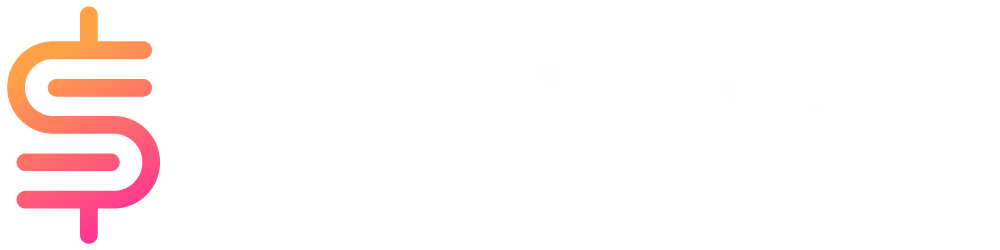
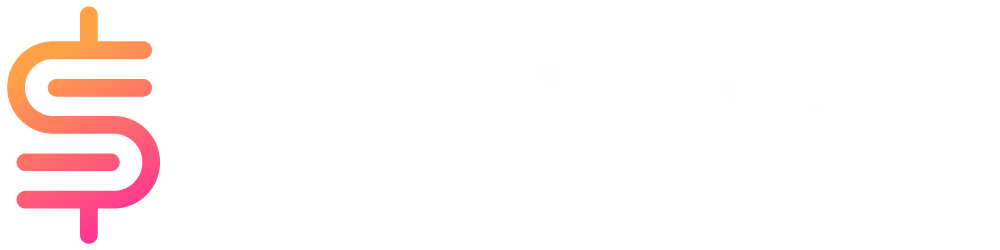

In [97]:
soup

In [98]:
# 웹 브라우저 종료
driver.close()

In [102]:
ul_data = soup.find(
    'ul', attrs={
        'class' : 'stream-items yf-1drgw5l'
    }
)
ul_data

<ul class="stream-items yf-1drgw5l"> <li class="stream-item story-item yf-1drgw5l"><section class="container sz-x-large stream yf-1jsv3x8 responsive" data-testid="storyitem" role="article"><a aria-label="‘Classic Apple': Why Apple is taking the slow road with AI" class="subtle-link fin-size-small thumb yf-17w8w6" data-rapid_p="420" data-v9y="1" data-ylk="elm:img;elmt:link;itc:0;ct:story;slk:%E2%80%98Classic%20Apple'%3A%20Why%20Apple%20is%20taking%20the%20slow%20road%20with%20AI;sec:qsp-news;subsec:all;cpos:1;g:3b61aa89-4503-43c3-997e-dd8d985a08b7" href="https://finance.yahoo.com/news/classic-apple-why-apple-is-taking-the-slow-road-with-ai-190306633.html" title="‘Classic Apple': Why Apple is taking the slow road with AI"><div style="display: contents; --border-radius: var(--border-radius-m); --aspect-ratio: 4/3;"><img alt="‘Classic Apple': Why Apple is taking the slow road with AI" class="tw-bg-opacity-25 yf-13q9uv1" fetchpriority="auto" loading="lazy" src="https://s.yimg.com/uu/api/res

In [103]:
a_list = ul_data.find_all('a')

In [118]:
_list = []
for i in a_list:
    href = i['href']
    if href not in _list and href.startswith('https://finance'):
        _list.append(href)
_list

['https://finance.yahoo.com/news/classic-apple-why-apple-is-taking-the-slow-road-with-ai-190306633.html',
 'https://finance.yahoo.com/news/apple-wwdc-underwhelms-fans-crucial-040908064.html',
 'https://finance.yahoo.com/news/nvidia-samsung-plan-investments-robotics-001732590.html',
 'https://finance.yahoo.com/news/apple-open-ai-models-app-213114139.html',
 'https://finance.yahoo.com/news/apple-aapl-gets-buy-rating-204555086.html',
 'https://finance.yahoo.com/news/top-research-reports-apple-walt-201900024.html',
 'https://finance.yahoo.com/news/features-coming-apple-ios-apps-193900718.html',
 'https://finance.yahoo.com/news/jim-cramer-notes-hard-own-193255926.html',
 'https://finance.yahoo.com/news/wwdc-apple-says-ai-tag-181733246.html',
 'https://finance.yahoo.com/news/buy-sell-hold-apple-stock-163200671.html',
 'https://finance.yahoo.com/news/whatsapp-fights-yvette-cooper-dangerous-134755062.html',
 'https://finance.yahoo.com/m/4205eaa9-f620-3a0b-a81a-0e82c7c9fd0b/magnificent-seven-st

In [112]:
# 기사 목록의 헤드라인은 h3태그
h3_list = ul_data.find_all('h3')

In [115]:
headline = []

for h3_data in h3_list:
    headline.append(h3_data.get_text())
headline

["‘Classic Apple': Why Apple is taking the slow road with AI",
 'Apple WWDC underwhelms fans in a crucial upgrade',
 'Nvidia, Samsung Plan Investments in Robotics Startup Skild AI',
 'Apple to Open its AI Models to App Developers',
 'Apple (AAPL) Gets Buy Rating Despite AI Letdown at WWDC25, Says Goldman Sachs',
 'Top Research Reports for Apple, Walt Disney & AMD',
 'All of the new features coming to Apple’s iOS apps',
 'Jim Cramer Notes “It’s Been Hard to Own Apple Lately”',
 'At WWDC, Apple says it will use AI to tag apps to improve discoverability on the App Store',
 'Buy, Sell or Hold the Apple Stock Post the WWDC25 Announcements?',
 'WhatsApp fights Yvette Cooper’s ‘dangerous’ attempt to break encryption',
 'Magnificent Seven Stocks: Nvidia, Tesla Rally; Apple, Amazon Fall',
 '3 Reasons to Buy This Beaten-Down Warren Buffett Stock',
 '4 observations about Apple’s low-key WWDC 2025',
 "Steve Jobs Would 'Have Fired Everyone': Apple's Liquid Glass In iOS 26 Gets Roasted Online — Dan 

In [ ]:
# 기사 링크의 개수와 헤드라인의 개수가 같은지 확인
print(len(_list))
print(len(headline))

20
20


In [121]:
import pandas as pd

In [142]:
df = pd.DataFrame(
    {
        'headline': headline,
        'url': _list
    }
)

In [141]:
# pandas 데이터프레임의 행,열 값 변경
pd.DataFrame(
    [headline, _list]
).transpose()           # transpose() 대신 T 사용 가능

,0,1
0,‘Classic Apple': Why Apple is taking the slow ...,https://finance.yahoo.com/news/classic-apple-w...
1,Apple WWDC underwhelms fans in a crucial upgrade,https://finance.yahoo.com/news/apple-wwdc-unde...
2,"Nvidia, Samsung Plan Investments in Robotics S...",https://finance.yahoo.com/news/nvidia-samsung-...
3,Apple to Open its AI Models to App Developers,https://finance.yahoo.com/news/apple-open-ai-m...
4,Apple (AAPL) Gets Buy Rating Despite AI Letdow...,https://finance.yahoo.com/news/apple-aapl-gets...
5,"Top Research Reports for Apple, Walt Disney & AMD",https://finance.yahoo.com/news/top-research-re...
6,All of the new features coming to Apple’s iOS ...,https://finance.yahoo.com/news/features-coming...
7,Jim Cramer Notes “It’s Been Hard to Own Apple ...,https://finance.yahoo.com/news/jim-cramer-note...
8,"At WWDC, Apple says it will use AI to tag apps...",https://finance.yahoo.com/news/wwdc-apple-says...
9,"Buy, Sell or Hold the Apple Stock Post the WWD...",https://finance.yahoo.com/news/buy-sell-hold-a...


In [145]:
df.to_csv('./data/AAPL_news.csv', index=False)